In [1]:
import tensorflow_datasets as tfds

dataset, ds_info = tfds.load(name='mnist', shuffle_files=True, with_info=True)

In [2]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\minky\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [3]:
print(dir(ds_info))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_builder', '_dataset_info_path', '_features', '_fully_initialized', '_info_proto', '_license_path', '_metadata', '_splits', 'as_json', 'as_proto', 'citation', 'data_dir', 'dataset_size', 'description', 'disable_shuffling', 'download_size', 'features', 'file_format', 'full_name', 'homepage', 'initialize_from_bucket', 'initialized', 'metadata', 'module_name', 'name', 'read_from_directory', 'redistribution_info', 'set_file_format', 'set_splits', 'splits', 'supervised_keys', 'version', 'write_to_directory']


In [4]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [5]:
ds_info.splits

{'train': <SplitInfo num_examples=60000, num_shards=1>,
 'test': <SplitInfo num_examples=10000, num_shards=1>}

In [6]:
ds_info.splits['train'].num_examples

60000

In [7]:
ds_info.splits['test'].num_examples

10000

In [8]:
dataset = tfds.load(name='mnist', shuffle_files=True)
print(type(dataset))

<class 'dict'>


In [9]:
print(dataset.keys())

dict_keys(['train', 'test'])


In [10]:
print(dataset.values())

dict_values([<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>, <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>])


In [11]:
train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

print(type(train_ds))
print(type(test_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>


In [12]:
for tmp in train_ds:
  print(type(tmp)) # dict 형식
  print(tmp.keys())
  
  images = tmp['image']
  labels = tmp['label']
  
  print(images.shape)
  print(labels.shape)
  
  break

<class 'dict'>
dict_keys(['image', 'label'])
(32, 28, 28, 1)
(32,)


In [13]:
EPOCHS = 10

for epoch in range(EPOCHS):
  for data in train_ds:
    images = data['image']
    labels = data['label']

In [14]:
dataset = tfds.load(name='mnist', shuffle_files=True, as_supervised=True)

"""
as_supervised를 사용하여 dataset을 더 간단하게 나눌 수 있다.
"""

train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

for tmp in train_ds:
  print(type(tmp)) # tuple 형식
  print(len(tmp))
  
  images = tmp[0]
  labels = tmp[1]
  
  print(images.shape)
  print(labels.shape)
  
  break

"""
따라서 더 간단하게 images와 labels를 받아 올 수 있다.
"""

<class 'tuple'>
2
(32, 28, 28, 1)
(32,)


'\n따라서 더 간단하게 images와 labels를 받아 올 수 있다.\n'

In [15]:
for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  
  break

(32, 28, 28, 1)
(32,)


In [16]:
train_ds, test_ds = tfds.load(name='mnist',
                              shuffle_files=True,
                              as_supervised=True,
                              split=['train', 'test'])

train_ds = train_ds.batch(32)

for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  
  break

"""
split을 사용하여 trainset과 testset을 애초에 나눠서 가져올 수 있다.
"""

(32, 28, 28, 1)
(32,)


'\nsplit을 사용하여 trainset과 testset을 애초에 나눠서 가져올 수 있다.\n'

In [17]:
(train_ds, test_ds), ds_info = tfds.load(name='mnist',
                                        shuffle_files=True,
                                        as_supervised=True,
                                        split=['train', 'test'],
                                        with_info=True)

train_ds = train_ds.batch(32)

for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  
  break

"""
다만, split과 with_info를 같이 사용할 때에는, trainset과 testset을 tuple로 묶고,
info가 저장되는 변수를 추가주어야 한다.
"""

(32, 28, 28, 1)
(32,)


'\n다만, split과 with_info를 같이 사용할 때에는, trainset과 testset을 tuple로 묶고,\ninfo가 저장되는 변수를 추가주어야 한다.\n'

In [18]:
(train_ds, validation_ds, test_ds), ds_info = tfds.load(name='patch_camelyon',
                                                        shuffle_files=True,
                                                        as_supervised=True,
                                                        split=['train', 'validation', 'test'],
                                                        with_info=True,
                                                        batch_size=16)

train_ds = train_ds.shuffle(10000)
# train_ds = train_ds.batch(32)

"""
batch size를 지정하는 두 방법이 중복되지 않도록 주의한다.
중복되게 된다면 중복된 만큼 demention이 늘어난다.
"""

print(ds_info.features, '\n')
print(ds_info.splits)

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
}) 

{'test': <SplitInfo num_examples=32768, num_shards=8>, 'train': <SplitInfo num_examples=262144, num_shards=64>, 'validation': <SplitInfo num_examples=32768, num_shards=8>}


In [19]:
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

print(images.shape)

(16, 96, 96, 3)


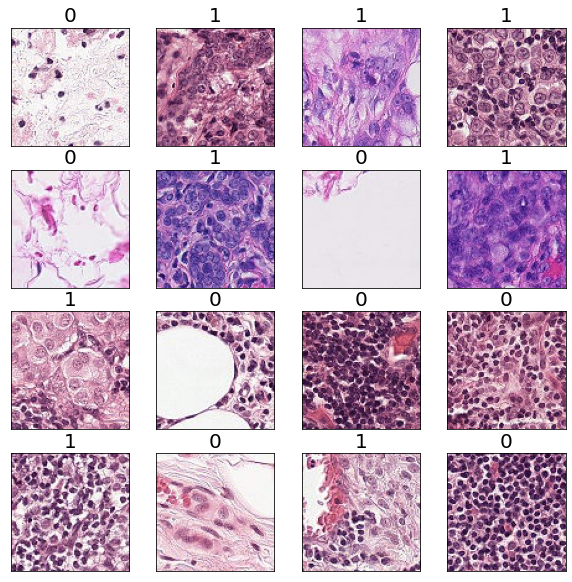

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax_idx, ax in enumerate(axes.flat):
  ax.imshow(images[ax_idx, ...].numpy())
  ax.set_title(labels[ax_idx].numpy(), fontsize=20)
  
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)